# MAGIC Gamma Telescope

Data information: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope



In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler # to standarize
from imblearn.over_sampling import RandomOverSampler# to oversampler


In [41]:
os.chdir('C:\\Users\\Julian\\Desktop\\Cursos\\Cursos Github\\Machine_learning')
os.listdir()

['.git',
 '.gitattributes',
 'Basic_tools',
 'Data',
 'Inteligencia_artificial.pdf',
 'Introduction to python',
 'k-Means Clustering',
 'Logistic regression',
 'Machine learning algorithms',
 'README.md']

In [42]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv('Data\\magic04.data', names = cols)
df.sample(3)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
7697,17.0648,7.4209,2.2889,0.7969,0.5681,-0.8238,-3.5940,4.8799,69.1441,231.783,g
17548,13.9485,11.9322,2.4082,0.7109,0.4941,-1.7021,-6.3541,9.8194,65.6699,148.228,h
16260,122.3580,40.9553,3.4474,0.1788,0.1019,-114.1330,-93.7356,26.7799,13.5059,291.361,h


In [43]:
df['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

In [44]:
# We're going to convert this to zero for G and one for H

df['class'] =  (df['class'] == 'g').astype(int)

In [45]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [46]:
df['class'].value_counts()

class
1    12332
0     6688
Name: count, dtype: int64

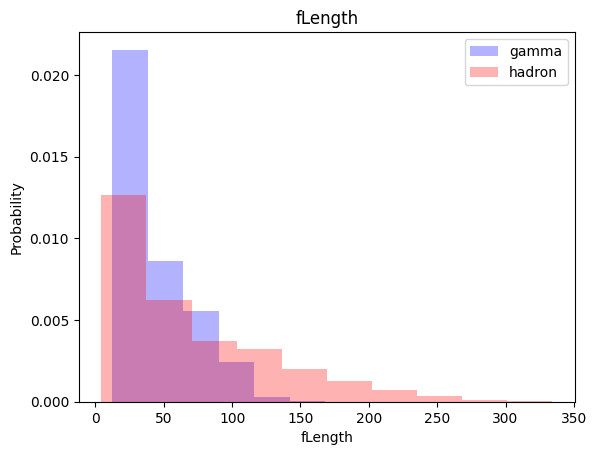

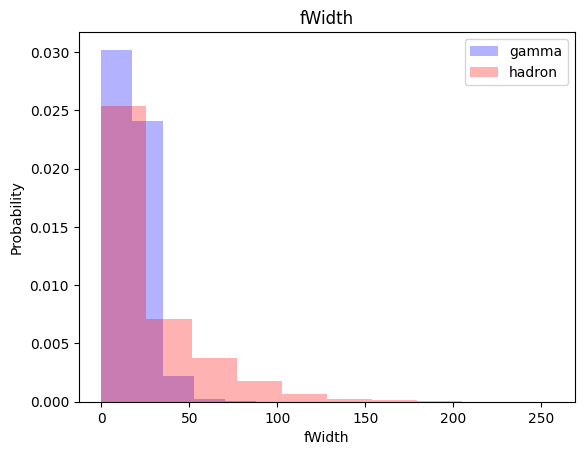

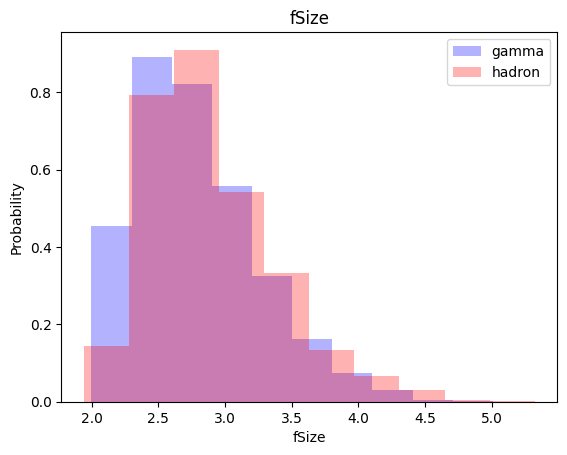

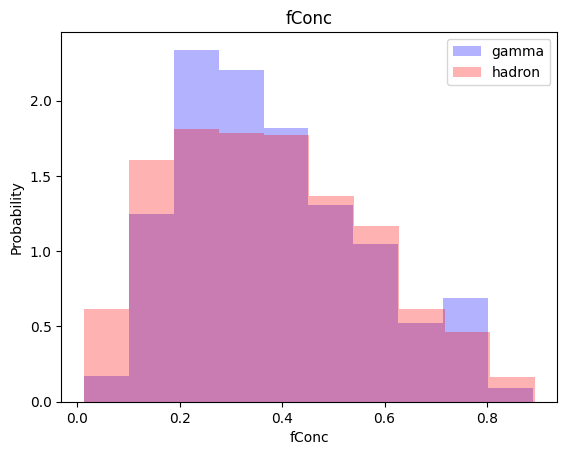

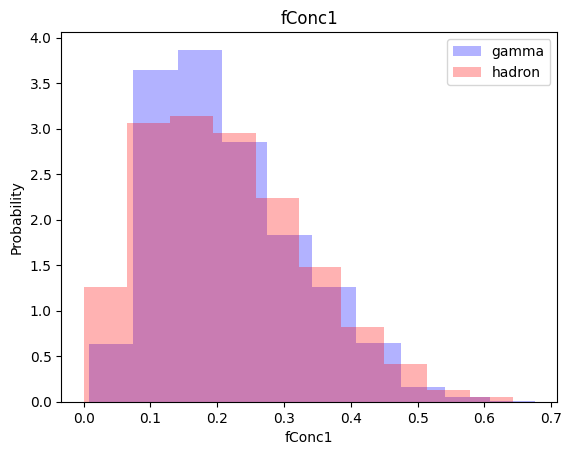

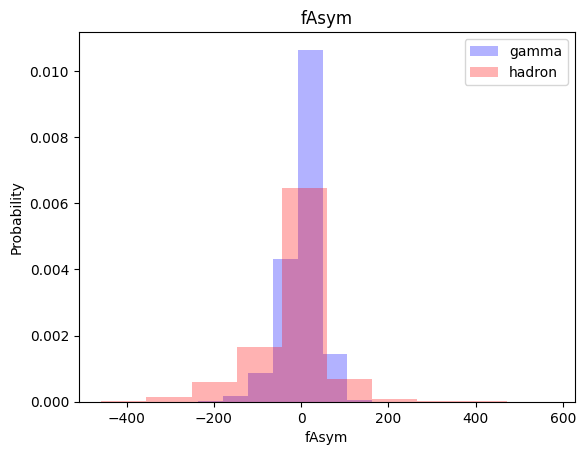

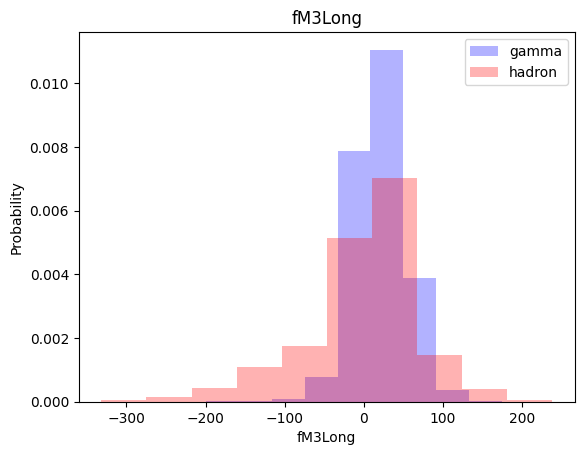

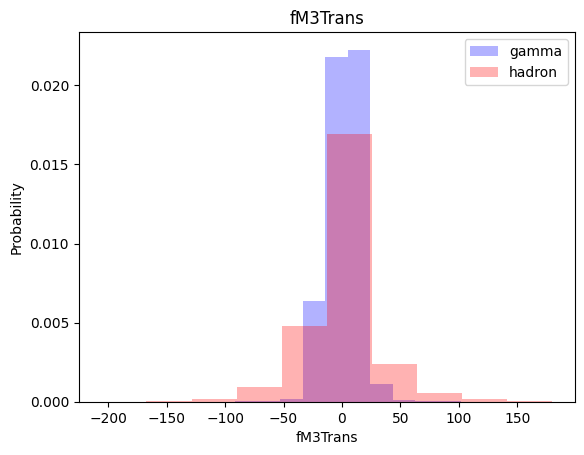

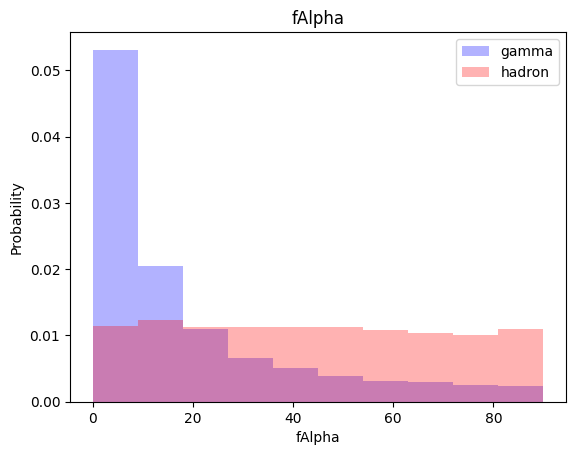

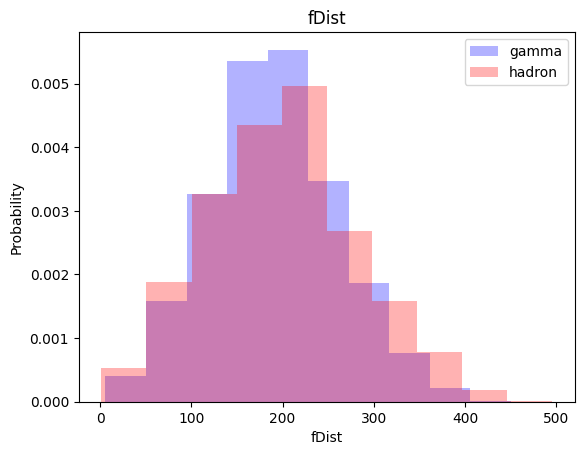

In [47]:
# We want to predict whether the class is G for gamma or H for hadron, given some features
# That is known as classification task

for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.3, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.3, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test datasets

https://colab.research.google.com/drive/16w3TDn_tAku17mum98EWTmjaLHAJcsk0?usp=sharing#scrollTo=xegvSGKr1y4-

https://www.youtube.com/watch?v=i_LwzRVP7bg

Data

In [48]:
# We want to split our data set randomly
df.sample(frac= 1) # selects a random fraction of our df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18105,31.1424,9.3064,2.6739,0.4767,0.2786,-3.7894,21.0948,-4.2359,53.9669,55.5175,0
1152,21.5650,15.4762,2.4594,0.4167,0.2135,28.4107,-7.4089,8.2183,3.8960,209.4420,1
4435,45.0410,21.7446,3.2604,0.2092,0.1156,28.9406,18.7778,13.4478,11.5310,206.4490,1
5885,33.9312,18.9590,2.8142,0.3021,0.1664,24.8683,15.8333,-14.2404,9.6812,134.4750,1
5642,18.2548,10.5312,2.2330,0.5789,0.3012,-1.6564,7.8390,-5.5313,0.5350,76.4374,1
...,...,...,...,...,...,...,...,...,...,...,...
12892,180.1275,89.0307,3.8010,0.1332,0.0842,-149.5416,128.2536,-77.0535,84.8175,347.4191,0
2405,34.6176,15.4927,2.6031,0.4214,0.2756,34.8654,31.8528,13.7698,22.7129,87.4655,1
12214,84.0531,23.9536,3.3467,0.2237,0.1393,-37.4403,49.5898,13.4314,3.1310,302.9370,1
12511,13.0046,10.9848,2.1189,0.7529,0.4525,-14.1025,6.2012,9.7395,70.6543,175.4590,0


In [80]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))]) # 60%, 20%,20%

C:\Users\Julian\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [72]:
train['class'].value_counts()

class
1    7389
0    4023
Name: count, dtype: int64

In [73]:
# We need to scale the features: We will standardize the data to a z-score of 0
# And we're going to oversample our data set

def scale_dataset(df, oversample = False):
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)	

    data = np.hstack((X, y.reshape((-1, 1))))

    return data, X, y

In [81]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
sum(y_train == 1)

Now we have our date properly formatted, so we can build some models.

7389

In [77]:
len(X_train)

14778